# Índice Salário - Salário IPCA

In [1]:
import os
import requests as req
import pandas as pd
import matplotlib.pyplot as plt
import nasdaqdatalink as nsdq
from bs4 import BeautifulSoup
from dotenv import load_dotenv
from utils.utils import *

### Pegar os dados do site do DIEESE

In [2]:
webpage = "https://www.dieese.org.br/analisecestabasica/salarioMinimo.html"
font_code = req.get(webpage).text
soup = BeautifulSoup(font_code, 'html.parser')

In [3]:
header = [column_name.text for column_name in soup.thead.tr.find_all('th')]

In [4]:
#header

### Tratamento dos Dados

In [5]:
dados = []
for rows in soup.tbody.find_all('tr'):
    if len(array:=rows.find_all('td')) > 1:
        dummy_array = [dados.text for dados in array]
        dummy_array[0] = '-'.join([ano,str(month_converter(dummy_array[0]))])
        dummy_array[1] = money_treatment(dummy_array[1])
        dummy_array[2] = money_treatment(dummy_array[2])
        dados.append(dummy_array)
    else:
        ano = array[0].text

In [6]:
#dados

In [7]:
df = pd.DataFrame(dados, columns=header)

In [8]:
df.set_index(pd.to_datetime(df['Período']), inplace=True)

In [9]:
df.drop('Período',inplace=True,axis=1)

In [10]:
#df.head()

In [11]:
df['indicador'] = df['Salário mínimo necessário']/df['Salário mínimo nominal']

### Carregar os dados do NASDAQ

Carregar a sua chave [NASDAQ](https://data.nasdaq.com/)

In [12]:
load_dotenv()
nsdq.ApiConfig.api_key = os.environ.get('NASDAQ_KEY')

In [13]:
ipca = nsdq.get("BCB/1635")

In [14]:
#ipca

### Fazer os gráficos

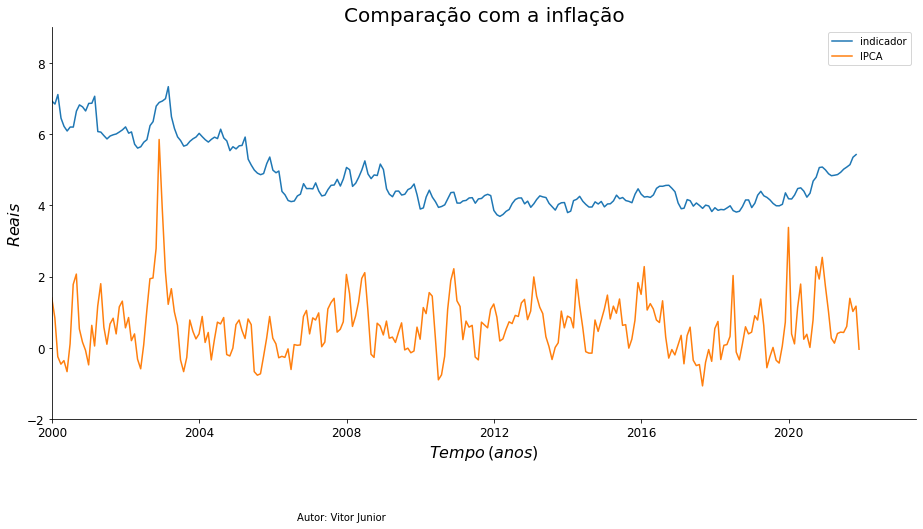

In [15]:
plt.figure(1,figsize=(20,8)) 
plot_configuration(r'$Tempo\:(anos)$',r'$Reais$','Comparação com a inflação')

plt.plot(df.index, df['indicador'], label='indicador')
plt.plot(ipca.index, ipca['Value'], label='IPCA')
plt.legend(loc='best', frameon=True)
plt.ylim(-2,9) 
plt.xlim(pd.to_datetime('2000-01-01'));       
plt.savefig(r'.\assets\img\indicador.png',format ='png')         

In [16]:
ipca.set_index(pd.to_datetime([f'{date.year}-{date.month}-01'
                               for date in ipca.index]), inplace=True)

In [17]:
df['ipca'] = ipca.Value

### Verificar se o indicador que eu utilizei tem alguma relação com o IPCA

In [18]:
df.corr(method = 'kendall')

,Salário mínimo nominal,Salário mínimo necessário,indicador,ipca
Salário mínimo nominal,1.000000,0.948414,-0.666466,0.034394
Salário mínimo necessário,0.948414,1.000000,-0.588837,0.056220
indicador,-0.666466,-0.588837,1.000000,0.038371
ipca,0.034394,0.056220,0.038371,1.000000


### Verificar qual o menor valor do indicador

In [19]:
df.loc[df.indicador.idxmin()]

Salário mínimo nominal        622.000000
Salário mínimo necessário    2295.580000
indicador                       3.690643
ipca                            0.250000
Name: 2012-03-01 00:00:00, dtype: float64